In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


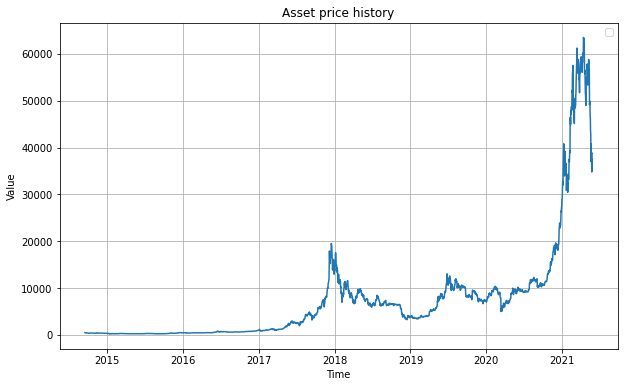

In [10]:
import csv
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None, title="Asset price history", legend=[]):
    plt.plot(time[start:end], series[start:end], format)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(legend)
    plt.grid(True)

# def plot_series(time, series, format="-", start=0, end=None):
#     plt.plot(time[start:end], series[start:end], format)
#     plt.xlabel("Time")
#     plt.ylabel("Value")
#     plt.grid(True)

def read_data(filepath='../data/BTC-USD.csv'):
    DATE_FORMAT = "%Y-%m-%d"
    time_step = []
    prices = []
    with open(filepath) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader) # skip header
        for row in reader:
            if row[4] != 'null':
                # date = datetime.strptime(row[0], DATE_FORMAT)
                # time_step.append(datetime.timestamp(date))
                time_step.append(datetime.strptime(row[0], DATE_FORMAT).date())
                prices.append(float(row[4]))
    # return np.array(time_step, dtype="float32"), np.array(prices, dtype="float32")
    return np.array(time_step), np.array(prices, dtype="float32")

time, series = read_data()
assert not np.any(np.isnan(series))
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

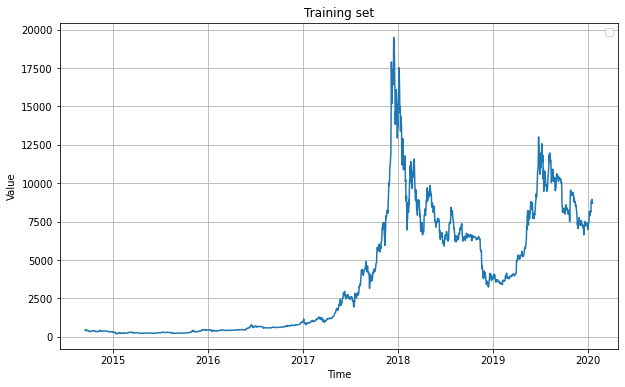

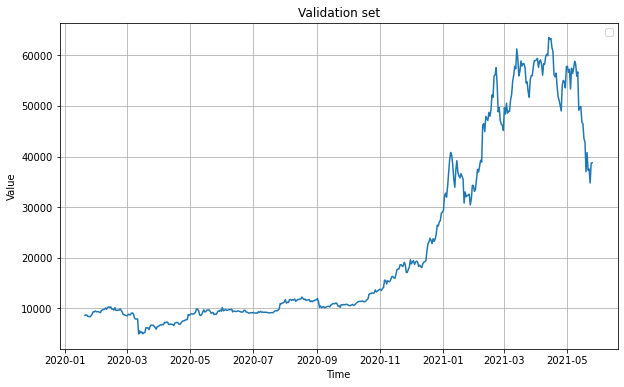

In [11]:
split_time = int(len(time) * 0.8)
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train, title="Training set")
plt.show()

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, title="Validation set")
plt.show()

In [12]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

# Normalize the sets:
max_train = np.max(np.abs(x_train), axis=0)
x_train /= max_train

max_valid = np.max(np.abs(x_valid), axis=0)
x_valid /= max_valid

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print("First dataset entry: " + str(list(dataset)[:1]))

First dataset entry: [(<tf.Tensor: shape=(32, 20), dtype=float32, numpy=
array([[0.03342928, 0.03356099, 0.03359602, 0.03369639, 0.03359663,
        0.0320392 , 0.03109501, 0.02807887, 0.02904772, 0.0296598 ,
        0.02949332, 0.03014648, 0.03039841, 0.0303145 , 0.03014766,
        0.03036831, 0.03021531, 0.03013525, 0.03003416, 0.02925893],
       [0.02961949, 0.02951532, 0.02935278, 0.02951865, 0.03068163,
        0.03121616, 0.03111133, 0.03130858, 0.03151928, 0.03212305,
        0.03194585, 0.03197908, 0.03111794, 0.03119611, 0.0312473 ,
        0.03132131, 0.03114031, 0.03113097, 0.03108025, 0.03127976],
       [0.02947214, 0.02961779, 0.03111835, 0.03450634, 0.03612666,
        0.03516156, 0.03561854, 0.03930309, 0.03841071, 0.03878604,
        0.03917348, 0.0378115 , 0.03419184, 0.03057413, 0.03200309,
        0.03412245, 0.03411342, 0.03227954, 0.03360833, 0.03318396],
       [0.01467832, 0.01509622, 0.01453266, 0.0148947 , 0.01409398,
        0.01362541, 0.01373496, 0.011584

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               2100      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 3,121
Trainable params: 3,121
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
61/61 - 0s - loss: 0.0217
Epoch 2/500
61/61 - 0s - loss: 0.0215
Epoch 3/500
61/61 - 0s - loss: 0.0214
Epoch 4/500
61/61 - 0s - loss: 0.0212
Epoch 5/500
61/61 - 0s - loss: 0.0210
Epoch 6/500
61/61 - 0s - loss: 0.0209
Epoch 7/500
61/61 - 0s - loss: 0.0207
Epoch 8/500
61/61 - 0s - loss: 0.0206
Epoch 9/500
61/61 - 0s - loss: 0.0204
Epoch 10/500
61/61 - 0s - loss: 0.0202
Epoch 11/500
61/61 - 0s - loss: 0.0201
Epoch 12/500
61/61 - 0s - loss: 0.0199
Epoch 13/500
61/61 - 0s - loss: 0.0198
Epoch 14/500
61/61 - 0s - loss: 0.0196
Epoch 15/500
61/61 - 0s - loss: 0.0195
Epoch 16/500
61/61 - 0s - loss: 0.0193
Epoch 17/500
61/61 - 0s - loss: 0.0192
Epoch 18/500
61/61 - 0s - loss: 0.0190
Epoch 19/500
61/61 - 0s - loss: 0.0189
Epoch 20/500
61/61 - 0s - loss: 0.0187
Epoch 21/500
61/61 - 0s - loss: 0.0186
Epoch 22/500
61/61 - 0s - loss: 0.0185
Epoch 23/500
61/61 - 0s - loss: 0.0183
Epoch 24/500
61/61 - 0s - loss: 0.0182
Epoch 25/500
61/61 - 0s - loss: 0.0181
Epoch 26/500
61/61 - 0s - loss: 0.

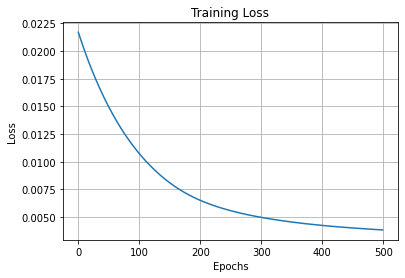

In [14]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
history = model.fit(dataset,epochs=500,verbose=2)

plt.plot(history.history['loss'])
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)

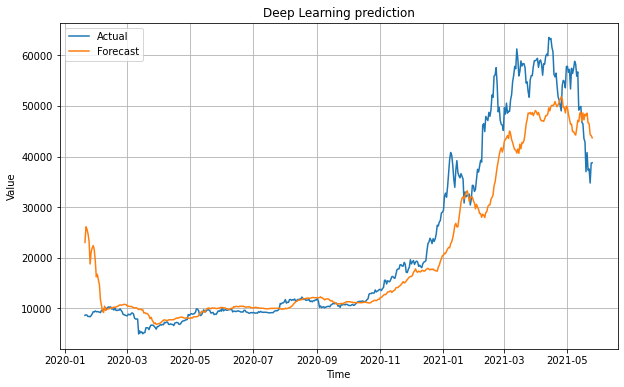

In [15]:
forecast = []

# forecast = []
# for time in range(len(series) - window_size):
#     forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
#
# forecast = forecast[split_time-window_size:]
# results = np.array(forecast)[:, 0, 0]

for time in range(len(series) - window_size):
    series_window = series[time:time + window_size]
    # series_window_expanded = np.expand_dims(series_window, axis=0)
    series_window_expanded = series_window[np.newaxis]
    predicted_value = model.predict(series_window_expanded)
    forecast.append(predicted_value)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

# Get back the absolute results to plot and calculate mean errors
results_abs = results * max_valid
x_valid_abs = x_valid * max_valid

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid_abs)
plot_series(time_valid, results_abs, title="Deep Learning prediction", legend=["Actual", "Forecast"])

In [16]:
print("MSE:")
print(tf.keras.metrics.mean_squared_error(x_valid_abs, results_abs).numpy())
print("MAE:")
print(tf.keras.metrics.mean_absolute_error(x_valid_abs, results_abs).numpy())

MSE:
43001720.0
MAE:
4110.766


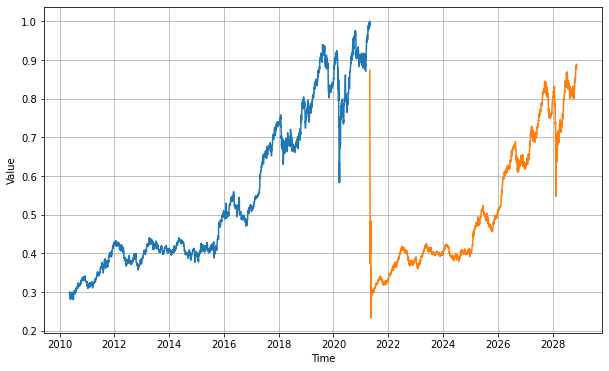

In [8]:
# x_valid_size = len(x_valid)
# future_size = x_valid_size
# future_forecast = []
# last_known_date = time_valid[-1]
# future_forecast_time = []
#
# future_forecast_draft = np.hstack((x_valid, np.zeros(future_size))).ravel()
# for time in range (0, future_size):
#     future_forecast_time.append(last_known_date + timedelta(days=time))
#     from_time = x_valid_size + time - window_size
#     to_time = x_valid_size + time
#     series_window = future_forecast_draft[from_time:to_time]
#     series_window_expanded = series_window[np.newaxis]
#     predicted_value = model.predict(series_window_expanded)
#     future_forecast_draft[to_time] = predicted_value[0, 0]
#     future_forecast.append(predicted_value)
#
# future_results = np.array(forecast)[:, 0, 0]
# plt.figure(figsize=(10, 6))
# plot_series(time_valid, x_valid)
# plot_series(future_forecast_time, future_results)